# Laboratorium 3

# Narzędzie graficzne

# Konstrukcja zbiorów punktów

In [2]:
def setA(n=100,low=-100,high=100):
    array = []
    for i in range(n):
        array.append((np.random.uniform(low,high),np.random.uniform(low,high)))
    return array

def setB(n=100,center=(0,0),radius=10):
    array = []
    for i in range(n):
        alpha = np.random.uniform(0,2*np.pi)
        array.append((center[0] + radius*np.cos(alpha),center[1] + radius*np.sin(alpha)))
    return array

def setC(n=100,vertices=[(-10,-10),(10,10)]): # vertices = [(Xmin,Ymin),(Xmax,Ymax)] - leftLower i rightUpper
    array = []
    for i in range(n):
        randomizer = np.random.randint(2)
        oppositeSide = np.random.randint(2)
        if randomizer:  
            randomNumber = np.random.uniform(vertices[0][0],vertices[1][0]) # horizontal
            if oppositeSide:
                array.append((randomNumber,vertices[1][1])) # upper
            else:
                array.append((randomNumber,vertices[0][1])) # lower
        else:
            randomNumber = np.random.uniform(vertices[0][1],vertices[1][1])  # vertical
            if oppositeSide:
                array.append((vertices[1][0],randomNumber)) # right
            else:
                array.append((vertices[0][0],randomNumber)) # left
    return array

def setD(vertices=[(0,0),(10,0),(10,10),(0,10)],n=25,m=20):
    array = [vertices[0],vertices[1],vertices[2],vertices[3]]
    for i in range(n):
        randomNumber1 = np.random.uniform(vertices[0][0],vertices[1][0])
        randomNumber2 = np.random.uniform(vertices[0][1],vertices[3][1])
        array.append((randomNumber1,0))
        array.append((0,randomNumber2))
    for i in range(m):
        x = np.random.uniform(vertices[0][0],vertices[1][0])
        x2 = np.random.uniform(vertices[0][0],vertices[1][0])
        array.append((x,x))
        array.append((x2,-1*x2 + vertices[3][1]))
    return array

# Zbiór A

<IPython.core.display.Javascript object>


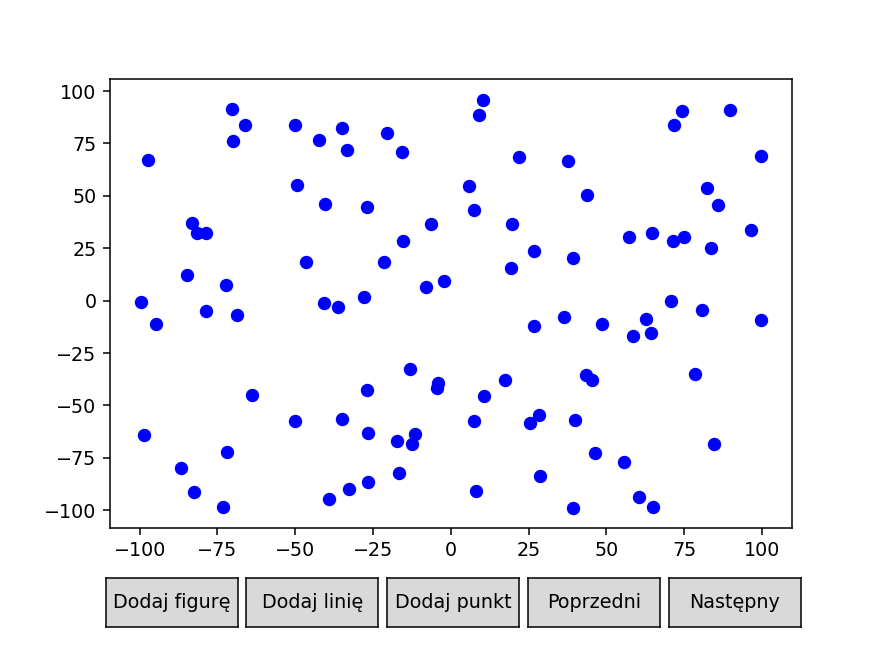

In [3]:
%matplotlib notebook
Plot(points = [PointsCollection(setA(),color="blue")]).draw()

# Zbiór B

<IPython.core.display.Javascript object>


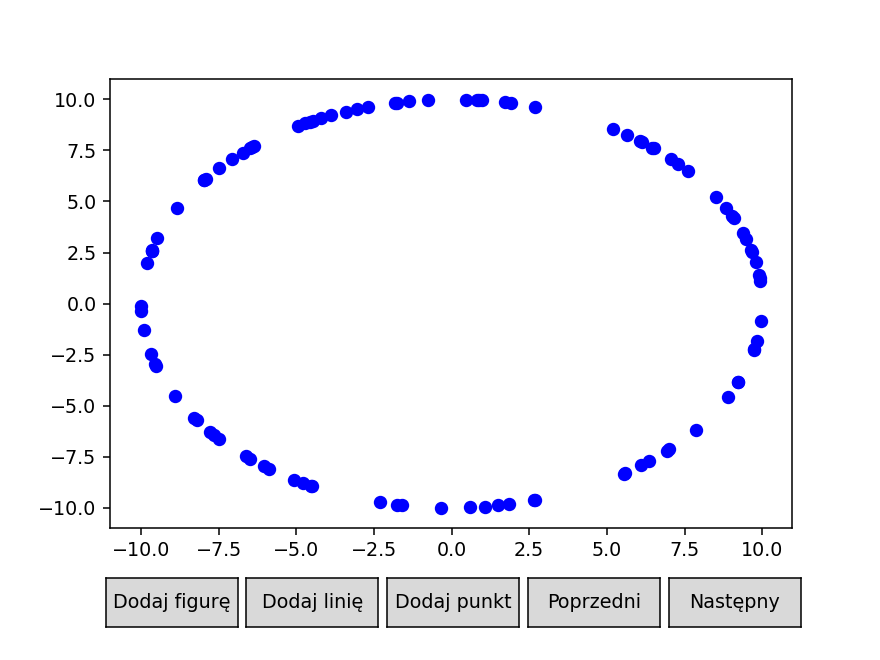

In [4]:
%matplotlib notebook
Plot(points = [PointsCollection(setB(),color="blue")]).draw()

# Zbiór C

<IPython.core.display.Javascript object>


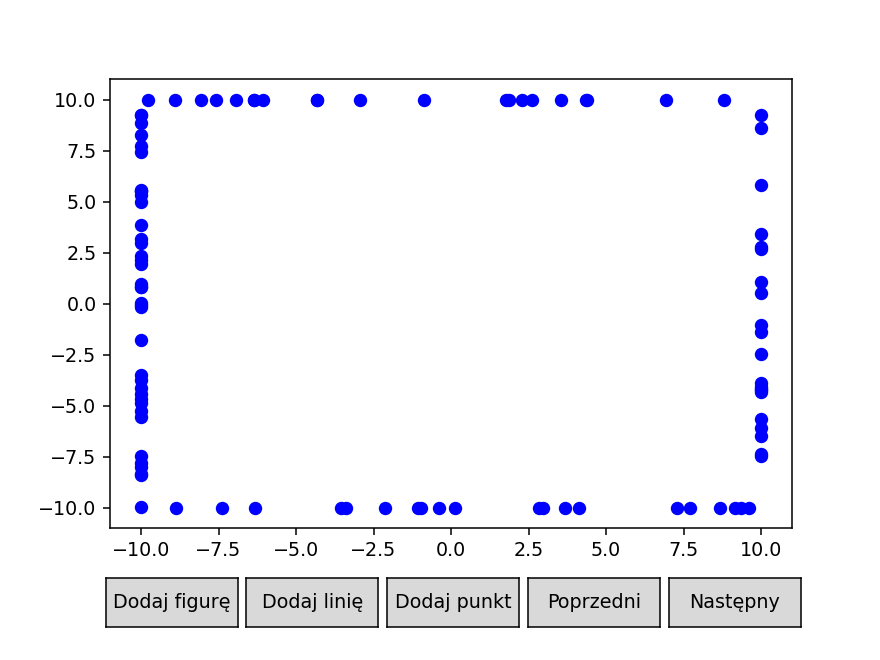

In [5]:
%matplotlib notebook
Plot(points = [PointsCollection(setC(),color="blue")]).draw()

# Zbiór D

<IPython.core.display.Javascript object>


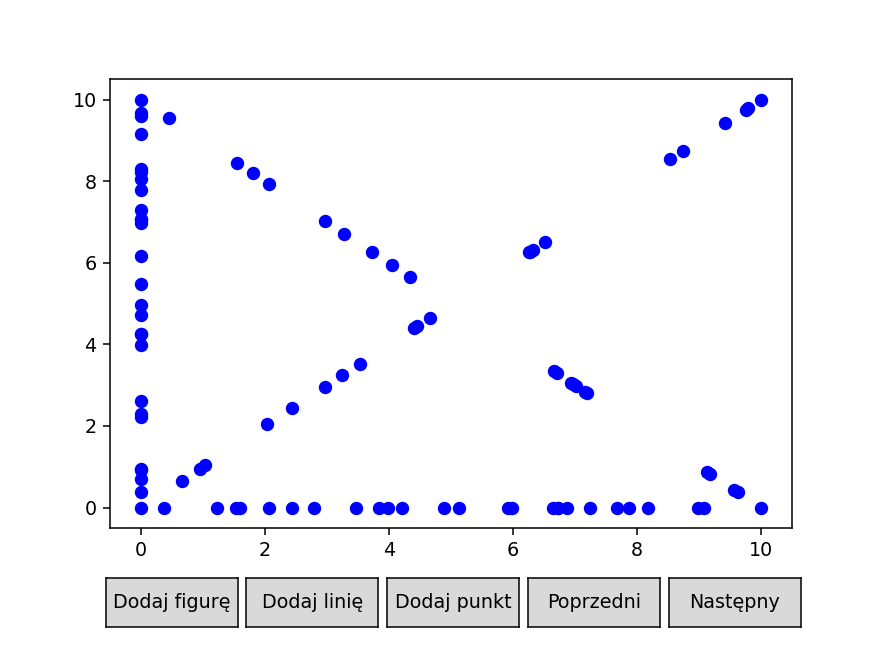

In [6]:
%matplotlib notebook
Plot(points = [PointsCollection(setD(),color="blue")]).draw()

# Funkcje

In [7]:
import math
def det(p,q,r): # wyznaczik 3x3
    return p[0]*q[1] + q[0]*r[1] + r[0]*p[1] - r[0]*q[1] - p[0]*r[1] - q[0]*p[1]
def minimumPoint(S):
    pointMin = S[0]
    pointsList = [S[0]]
    for elem in S[1:]:
        if elem[1] < pointMin[1]:
            pointMin = elem
            pointsList = [pointMin]
        elif elem[1] == pointMin[1]:
            pointsList.append(elem)
            
    return min(pointsList, key = lambda x:x[0])

def distance(p,minPoint): # bez pierwiastka - niepotrzebny
    q = (p[0]-minPoint[0],p[1]-minPoint[1])
    return q[0]**2 + q[1]**2

def alpha(p,q,r,e):
    d = det(p,q,r)
    if p == q :
        return -1
    elif p == r:
        return 1
    elif d > e:
        return -1
    elif d < -e:
        return 1
    elif -e<d<e:
        return 0
          
def delete_collinear(S,minPoint,e):
    i = 2
    while i < len(S):
        d = det(minPoint,S[i-1],S[i])
        if -e<d<e:
            if distance(S[i-1],minPoint) > distance(S[i],minPoint):
                S.pop(i)
            else:
                S.pop(i-1)
        else:
            i+=1
    return S

# Wyznaczanie otoczki wypukłej

## Algorytm Grahama

In [54]:
from functools import cmp_to_key
import copy
def Graham(S,e = 10**(-13)):
    minPoint = minimumPoint(S)
    S = sorted(S,key = cmp_to_key(lambda q,r : alpha(minPoint,q,r,e)))
    S = delete_collinear(S, minPoint, e)
    stack = [S[0],S[1],S[2]]
    i = 3
    while i < len(S):
        d = det(stack[-2],stack[-1],S[i])
        if d > e:
            stack.append(S[i])
            i += 1
        elif d > -e and d < e:
            stack.pop()
            stack.append(S[i])
            i += 1
        else:
            stack.pop()
    return stack

## Algorytm Jarvisa

In [9]:
def Jarvis(S, e = 10**(-10)):
    p = minimumPoint(S)
    stack = []
    flag = True
    i = 0
    while flag:     
        stack.append(p)
        q = S[0]
        for j in range(len(S)):
            d = det(stack[i],q,S[j])
            if p == q:
                q = S[j]
            elif -e<d<e:
                if distance(stack[i],q) < distance(stack[i],S[j]):
                    q = S[j]
            elif d < -e:
                q = S[j]
        i+=1
        if q == stack[0]:
            flag = False
        p = q
        
    return stack

# Ilustracja kroków algorytmów

In [98]:
def plotGraham(S,e = 10**(-10), save = False):
    
    plot = Plot(scenes = [Scene(points = [PointsCollection(S,color="blue")])])
    pointsBlue = S.copy()
    pointsGreen = []
    pointsRed = []
    linesRed = []
    linesGreen = []

    minPoint = minimumPoint(S)
    S = sorted(S,key = cmp_to_key(lambda q,r : alpha(minPoint,q,r,e)))
    S = delete_collinear(S, minPoint, e)
    
    stack = [S[0],S[1],S[2]]
    i = 3
    
    pointsGreen.append(S[0])
    pointsGreen.append(S[1])
    pointsGreen.append(S[2])
    linesGreen.append([pointsGreen[0],pointsGreen[1]])
    linesGreen.append([pointsGreen[1],pointsGreen[2]])
    plot.add_scene(Scene(points = [PointsCollection(pointsBlue.copy(),color="blue"),
                                   PointsCollection(pointsGreen.copy(),color="green"),
                                   PointsCollection(pointsRed.copy(),color="red")],
                         lines = [LinesCollection(linesRed.copy(),color="red"),
                                  LinesCollection(linesGreen.copy(),color="green")]))
    

    
    while i < len(S):
        d = det( stack[-2], stack[-1], S[i])
        
        pointsRed.append(S[i])
        linesRed.append([pointsGreen[-1],pointsRed[-1]])
        plot.add_scene(Scene(points = [PointsCollection(pointsBlue.copy(),color="blue"),
                                       PointsCollection(pointsGreen.copy(),color="green"),
                                       PointsCollection(pointsRed.copy(),color="red")],
                             lines = [LinesCollection(linesRed.copy(),color="red"),
                                      LinesCollection(linesGreen.copy(),color="green")]))
        pointsRed.pop()
        linesRed.pop()
        if d > e:
            stack.append(S[i])
        
            pointsGreen.append(S[i])
            linesGreen.append([pointsGreen[-2],pointsGreen[-1]])
            plot.add_scene(Scene(points = [PointsCollection(pointsBlue.copy(),color="blue"),
                                           PointsCollection(pointsGreen.copy(),color="green"),
                                           PointsCollection(pointsRed.copy(),color="red")],
                                 lines = [LinesCollection(linesRed.copy(),color="red"),
                                          LinesCollection(linesGreen.copy(),color="green")]))
            i += 1
        elif d > -e and d < e:
            stack.pop()
            stack.append(S[i])

            pointsGreen.pop()
            pointsGreen.append(S[i])
            
            linesGreen.pop()
            linesGreen.append([pointsGreen[-2],pointsGreen[-1]])
            
            plot.add_scene(Scene(points = [PointsCollection(pointsBlue.copy(),color="blue"),
                                           PointsCollection(pointsGreen.copy(),color="green"),
                                           PointsCollection(pointsRed.copy(),color="red")],
                                 lines = [LinesCollection(linesRed.copy(),color="red"),
                                          LinesCollection(linesGreen.copy(),color="green")]))
            i += 1
        else:
            stack.pop()
     
            pointsGreen.pop()
            linesGreen.pop()
            plot.add_scene(Scene(points = [PointsCollection(pointsBlue.copy(),color="blue"),
                                           PointsCollection(pointsGreen.copy(),color="green"),
                                           PointsCollection(pointsRed.copy(),color="red")],
                                 lines = [LinesCollection(linesRed.copy(),color="red"),
                                          LinesCollection(linesGreen.copy(),color="green")]))
    
    linesGreen.append([pointsGreen[-1],pointsGreen[0]])
    plot.add_scene(Scene(points = [PointsCollection(pointsBlue.copy(),color="blue"),
                                   PointsCollection(pointsGreen.copy(),color="green"),
                                   PointsCollection(pointsRed.copy(),color="red")],
                         lines = [LinesCollection(linesRed.copy(),color="red"),
                                  LinesCollection(linesGreen.copy(),color="green")]))
    if save:
        with open("graham.txt","w") as f:
            for p in stack:
                f.write(str(p))
    return plot

def plotJarvis(S, e = 10**(-10), save = False):
    plot = Plot(scenes = [Scene(points = [PointsCollection(S,color="blue")])])
    pointsBlue = S.copy()
    pointsGreen = []
    pointsPurple = []
    pointsRed = []
    linesRed = []
    linesGreen = []
    linesPurple = []
    
    p = minimumPoint(S)
    stack = []
    i = 0
    flag = True
    while flag:
        
        stack.append(p)
        
        pointsGreen.append(p)
        plot.add_scene(Scene(points = [PointsCollection(pointsBlue.copy(),color="blue"),
                                       PointsCollection(pointsGreen.copy(),color="green"),
                                       PointsCollection(pointsPurple.copy(),color="pink"),
                                       PointsCollection(pointsRed.copy(),color="red")],
                             lines  = [LinesCollection(linesRed.copy(),color="red"),
                                       LinesCollection(linesPurple.copy(),color="pink"),
                                       LinesCollection(linesGreen.copy(),color="green")]))
        
        q = S[0]
        pointsPurple.append(q)
        linesPurple.append([pointsGreen[-1],pointsPurple[-1]])
        for j in range(len(S)):
            
            pointsRed.append(S[j])
            plot.add_scene(Scene(points = [PointsCollection(pointsBlue.copy(),color="blue"),
                                           PointsCollection(pointsGreen.copy(),color="green"),
                                           PointsCollection(pointsPurple.copy(),color="pink"),
                                           PointsCollection(pointsRed.copy(),color="red")],
                                 lines  = [LinesCollection(linesRed.copy(),color="red"),
                                           LinesCollection(linesPurple.copy(),color="pink"),
                                           LinesCollection(linesGreen.copy(),color="green")]))
            pointsRed.pop()
            d = det(stack[i],q,S[j])

            if q == p:
                q = S[j]

            elif -e < d < e:
                if distance(stack[i],q) < distance(stack[i],S[j]):
                    q = S[j]

            elif d < -e:
                q = S[j]
                pointsPurple.pop()
                pointsPurple.append(q)
                linesPurple.pop()
                linesPurple.append([pointsGreen[-1],q])
                plot.add_scene(Scene(points = [PointsCollection(pointsBlue.copy(),color="blue"),
                                               PointsCollection(pointsGreen.copy(),color="green"),
                                               PointsCollection(pointsPurple.copy(),color="pink"),
                                               PointsCollection(pointsRed.copy(),color="red")],
                                     lines  = [LinesCollection(linesRed.copy(),color="red"),
                                               LinesCollection(linesPurple.copy(),color="pink"),
                                               LinesCollection(linesGreen.copy(),color="green")]))

        pointsPurple.pop()
        linesPurple.pop()
        pointsGreen.append(q)
        linesGreen.append([pointsGreen[-2],pointsGreen[-1]])
        plot.add_scene(Scene(points = [PointsCollection(pointsBlue.copy(),color="blue"),
                                       PointsCollection(pointsGreen.copy(),color="green"),
                                       PointsCollection(pointsPurple.copy(),color="pink"),
                                       PointsCollection(pointsRed.copy(),color="red")],
                             lines  = [LinesCollection(linesRed.copy(),color="red"),
                                       LinesCollection(linesPurple.copy(),color="pink"),
                                       LinesCollection(linesGreen.copy(),color="green")]))
        
        i += 1
        if q == stack[0]:
            flag = False
            
        p = q
    
    if save:
        with open("jarvis.txt","w") as f:
            for p in stack:
                f.write(str(p))
    return plot

# Algorytm Grahama zbiór A

<IPython.core.display.Javascript object>


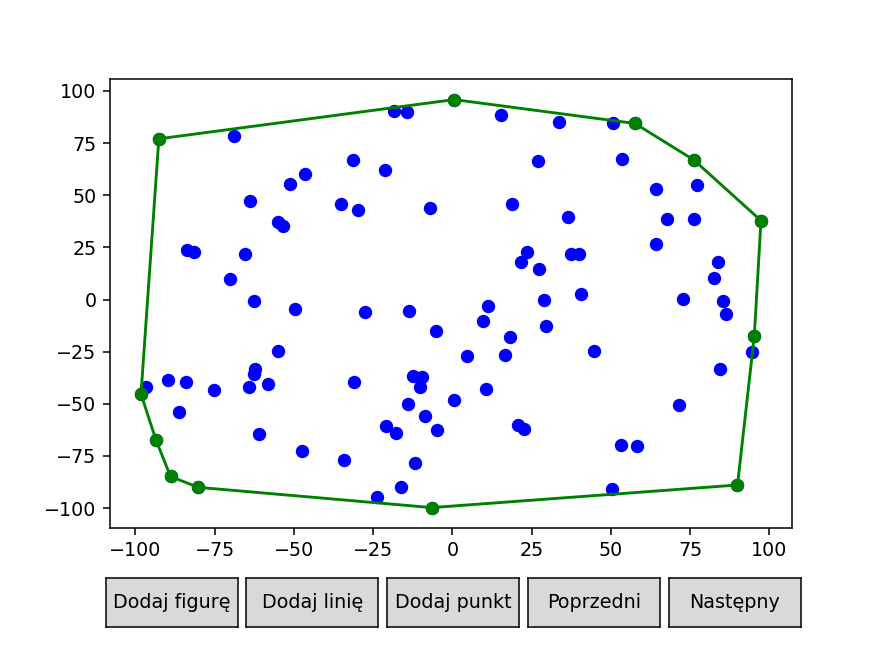

In [96]:
%matplotlib notebook
arrayA = setA()
plotAG = plotGraham(arrayA,save=True)
plotAG.draw()

# Algorytm Jarvisa zbiór A

<IPython.core.display.Javascript object>


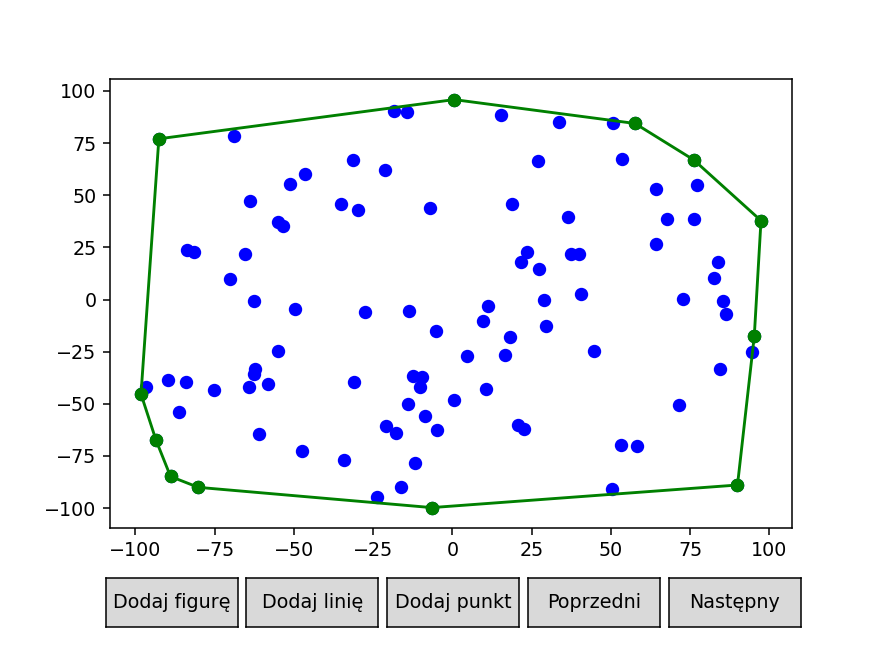

In [97]:
%matplotlib notebook
plotAJ = plotJarvis(arrayA)
plotAJ.draw()

# Algorytm Grahama zbiór B

<IPython.core.display.Javascript object>


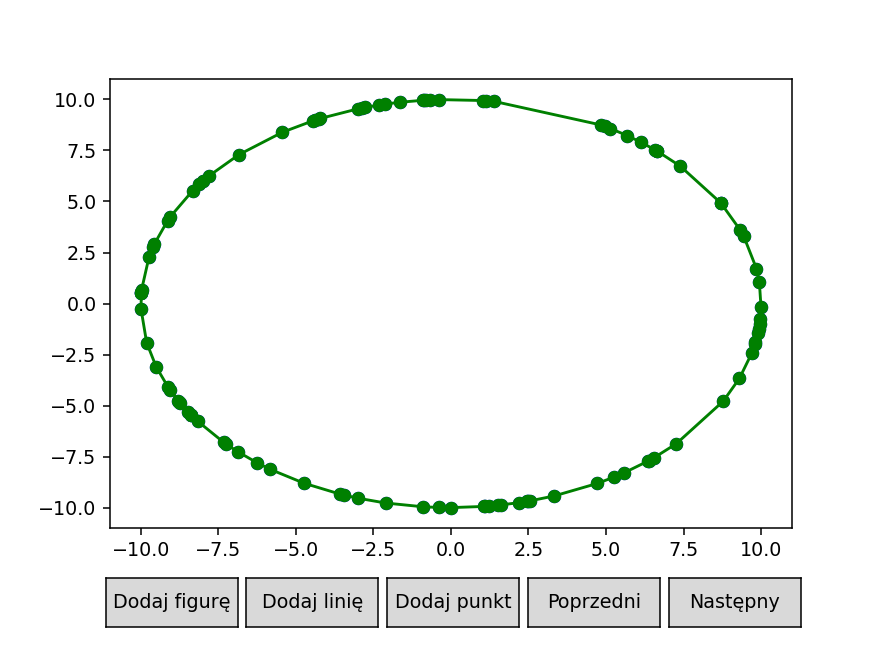

In [83]:
%matplotlib notebook
arrayB = setB()
plotBG = plotGraham(arrayB)
plotBG.draw()

# Algorytm Jarvisa zbiór B

<IPython.core.display.Javascript object>


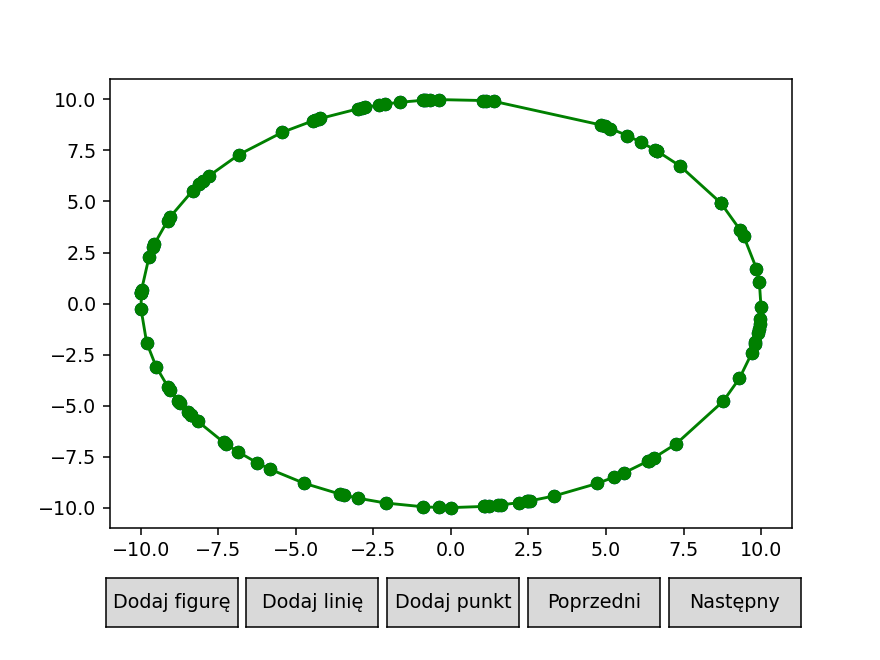

In [86]:
%matplotlib notebook
plotBJ = plotJarvis(arrayB)
plotBJ.draw()

# Algorytm Grahama zbiór C

<IPython.core.display.Javascript object>


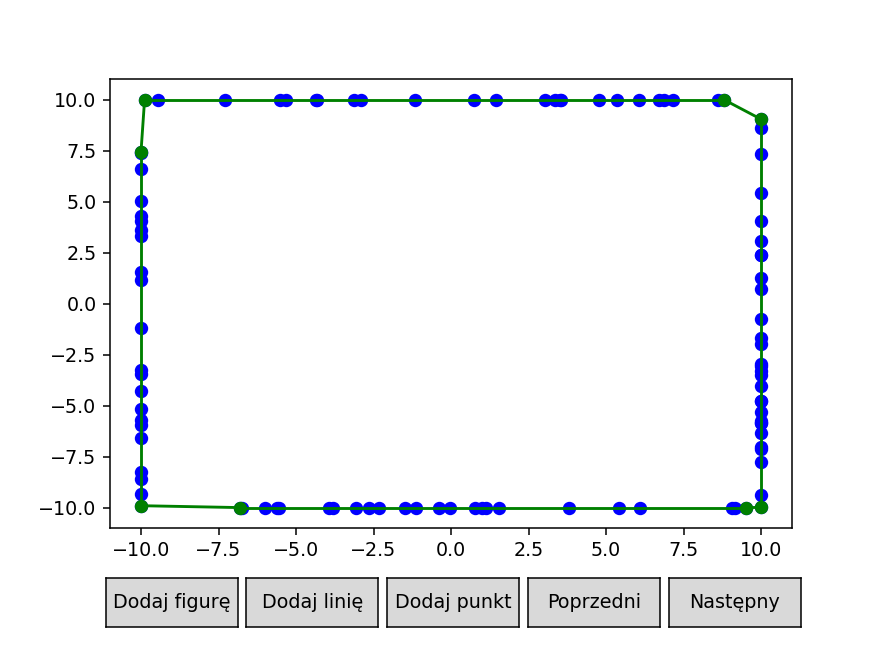

In [16]:
%matplotlib notebook
arrayC = setC()
plotCG = plotGraham(arrayC)
plotCG.draw()

# Algorytm Jarvisa zbiór C

<IPython.core.display.Javascript object>


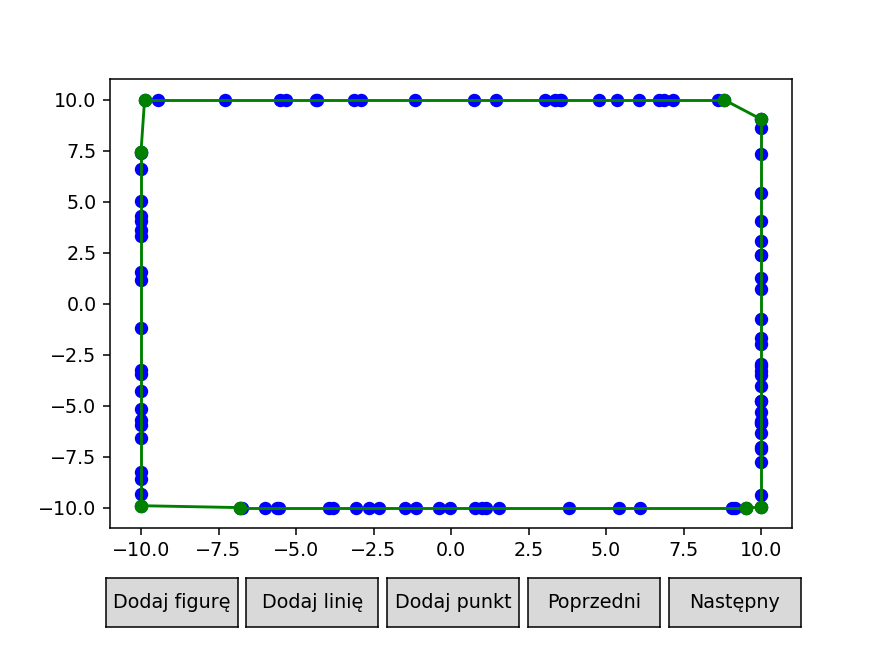

In [19]:
%matplotlib notebook
plotCJ = plotJarvis(arrayC)
plotCJ.draw()

# Algorytm Grahama zbiór D

<IPython.core.display.Javascript object>


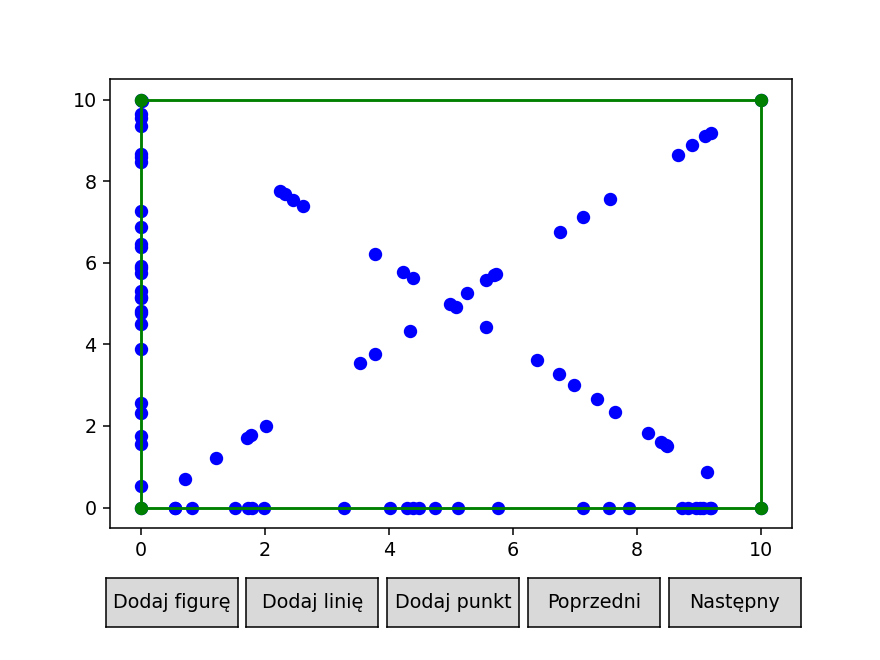

In [17]:
%matplotlib notebook
arrayD = setD()
plotDG = plotGraham(arrayD)
plotDG.draw()

# Algorytm Jarvisa zbiór D

<IPython.core.display.Javascript object>


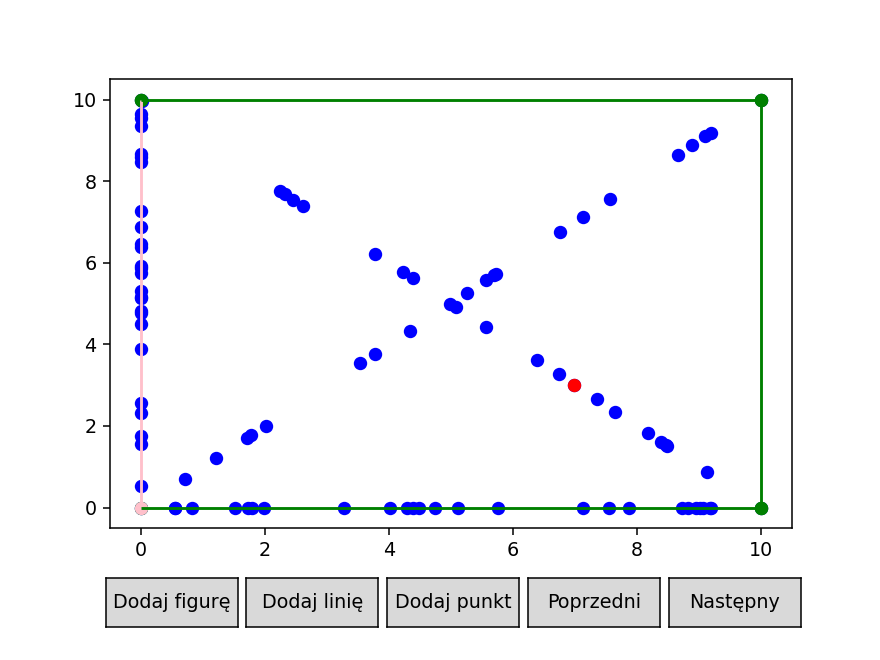

In [88]:
%matplotlib notebook
plotDJ = plotJarvis(arrayD)
plotDJ.draw()

# Wizualizacja kroków algorytmów na małym zbiorze punktów

## Algorytm Grahama

<IPython.core.display.Javascript object>


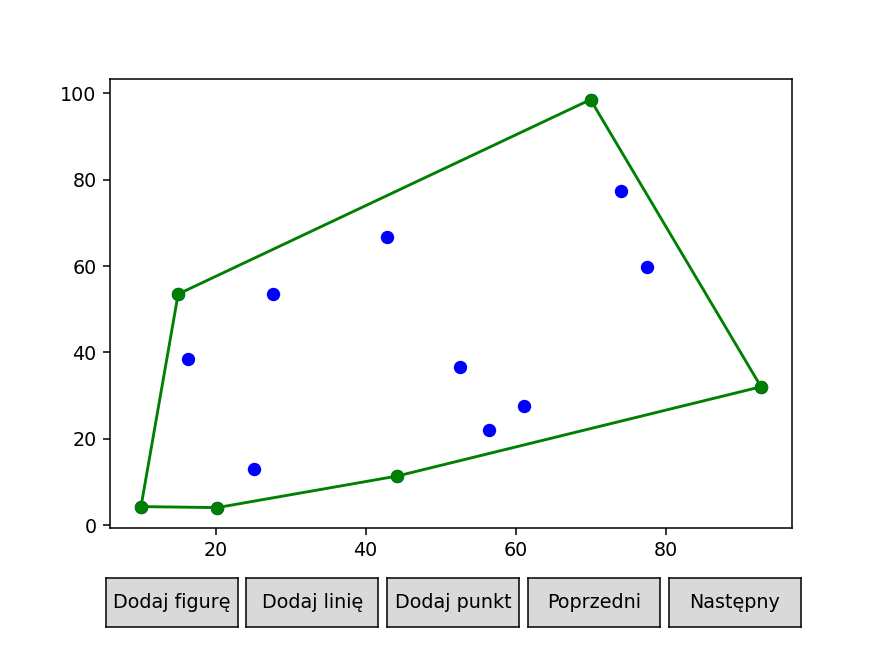

In [80]:
%matplotlib notebook
arrayTest1 = setA(15,0,100)
plotTestG = plotGraham(arrayTest1)
plotTestG.draw()

## Algorytm Jarvisa

<IPython.core.display.Javascript object>


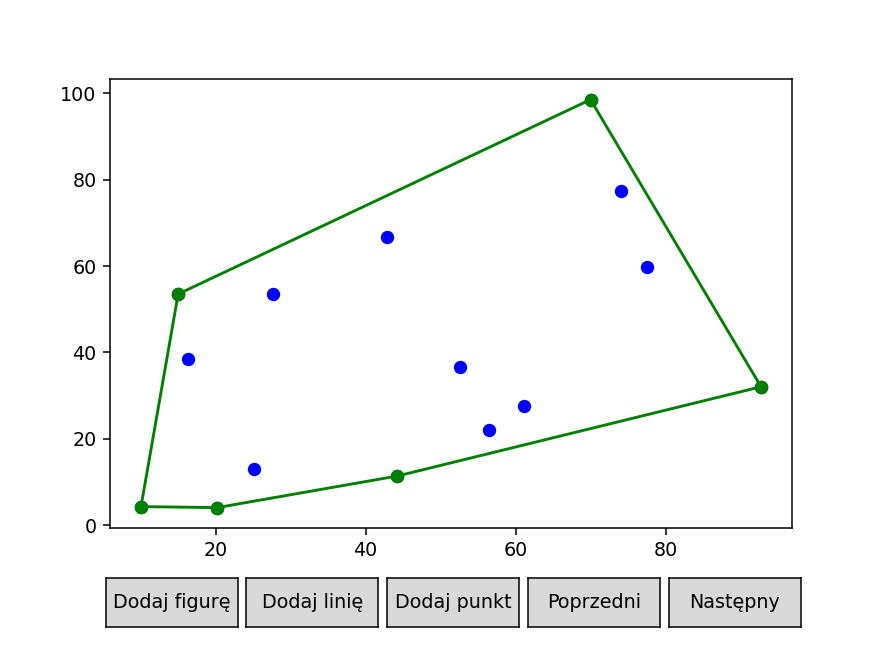

In [81]:
%matplotlib notebook
plotTestJ = plotJarvis(arrayTest1)
plotTestJ.draw()

<IPython.core.display.Javascript object>


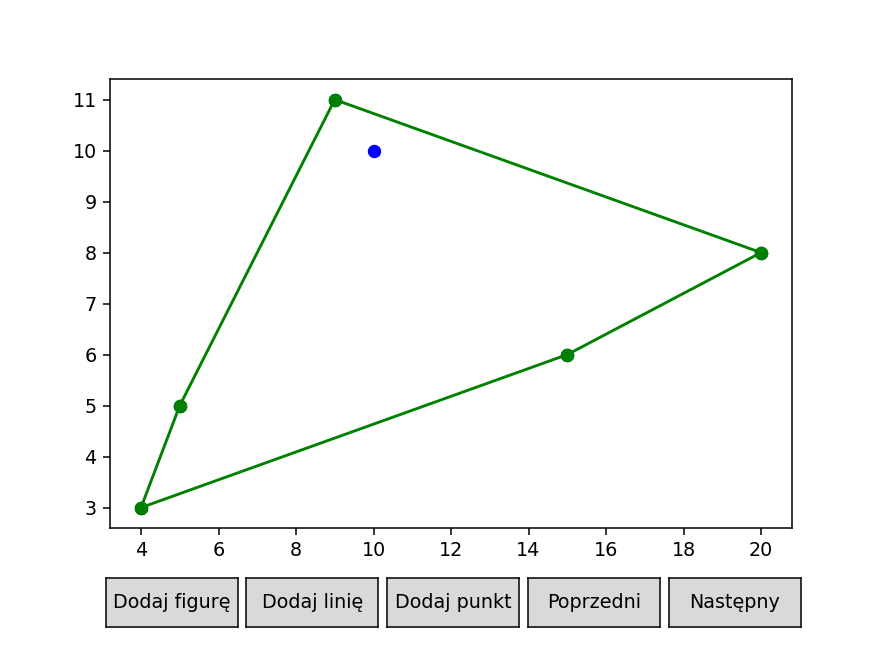

In [82]:
%matplotlib notebook
arrC = [(5,5),(10,10),(15,6),(20,8),(9,11),(4,3)]
plot2 = plotJarvis(arrC)
plot2.draw()

# Time test

## Algorytm Grahama i Jarvisa zbiór A

In [28]:
import time
print("n = 500")
testA1 = setA(500,-1000,1000)
start1 = time.time()
Graham(testA1.copy())
end1 = time.time() - start1
print("Czas działania algorytmu Grahama : ",end1," s")

start2 = time.time()
Jarvis(testA1.copy())
end2 = time.time() - start2
print("Czas działania algorytmu Jarvisa : ",end2," s")

n = 500
Czas działania algorytmu Grahama :  0.003981828689575195  s
Czas działania algorytmu Jarvisa :  0.003999471664428711  s


In [30]:
print("n = 1000")
testA2 = setA(1000,-1000,1000)
start1 = time.time()
Graham(testA2.copy())
end1 = time.time() - start1
print("Czas działania algorytmu Grahama : ",end1," s")

start2 = time.time()
Jarvis(testA2.copy())
end2 = time.time() - start2
print("Czas działania algorytmu Jarvisa : ",end2," s")

n = 1000
Czas działania algorytmu Grahama :  0.008967399597167969  s
Czas działania algorytmu Jarvisa :  0.010805368423461914  s


In [39]:
print("n = 1500")
testA3 = setA(1500,-1000,1000)
start1 = time.time()
Graham(testA3.copy())
end1 = time.time() - start1
print("Czas działania algorytmu Grahama : ",end1," s")

start2 = time.time()
Jarvis(testA3.copy())
end2 = time.time() - start2
print("Czas działania algorytmu Jarvisa : ",end2," s")

n = 1500
Czas działania algorytmu Grahama :  0.016963481903076172  s
Czas działania algorytmu Jarvisa :  0.0220339298248291  s


In [45]:
print("n = 2000")
testA4 = setA(2000,-1000,1000)
start1 = time.time()
Graham(testA4.copy())
end1 = time.time() - start1
print("Czas działania algorytmu Grahama : ",end1," s")

start2 = time.time()
Jarvis(testA4.copy())
end2 = time.time() - start2
print("Czas działania algorytmu Jarvisa : ",end2," s")

n = 2000
Czas działania algorytmu Grahama :  0.022996902465820312  s
Czas działania algorytmu Jarvisa :  0.027005434036254883  s


## Algorytm Grahama i Jarvisa zbiór B

In [40]:
print("n = 500")
testB1 = setB(500,(0,0),100)
start1 = time.time()
Graham(testB1.copy())
end1 = time.time() - start1
print("Czas działania algorytmu Grahama : ",end1," s")

start2 = time.time()
Jarvis(testB1.copy())
end2 = time.time() - start2
print("Czas działania algorytmu Jarvisa : ",end2," s")

n = 500
Czas działania algorytmu Grahama :  0.012969017028808594  s
Czas działania algorytmu Jarvisa :  0.5580830574035645  s


In [41]:
print("n = 1000")
testB2 = setB(1000,(0,0),100)
start1 = time.time()
Graham(testB2.copy())
end1 = time.time() - start1
print("Czas działania algorytmu Grahama : ",end1," s")

start2 = time.time()
Jarvis(testB2.copy())
end2 = time.time() - start2
print("Czas działania algorytmu Jarvisa : ",end2," s")

n = 1000
Czas działania algorytmu Grahama :  0.024004697799682617  s
Czas działania algorytmu Jarvisa :  2.4372963905334473  s


In [42]:
print("n = 1500")
testB3 = setB(1500,(0,0),100)
start1 = time.time()
Graham(testB3.copy())
end1 = time.time() - start1
print("Czas działania algorytmu Grahama : ",end1," s")

start2 = time.time()
Jarvis(testB3.copy())
end2 = time.time() - start2
print("Czas działania algorytmu Jarvisa : ",end2," s")

n = 1500
Czas działania algorytmu Grahama :  0.03464198112487793  s
Czas działania algorytmu Jarvisa :  5.1198790073394775  s


In [43]:
print("n = 2000")
testB4 = setB(2000,(0,0),100)
start1 = time.time()
Graham(testB4.copy())
end1 = time.time() - start1
print("Czas działania algorytmu Grahama : ",end1," s")

start2 = time.time()
Jarvis(testB4.copy())
end2 = time.time() - start2
print("Czas działania algorytmu Jarvisa : ",end2," s")

n = 2000
Czas działania algorytmu Grahama :  0.05298304557800293  s
Czas działania algorytmu Jarvisa :  8.503371238708496  s


## Algorytm Grahama i Jarvisa zbiór C

In [59]:
print("n = 500")
testC1 = setC(500,[(-1000,-1000),(1000,1000)])
start1 = time.time()
Graham(testC1.copy())
end1 = time.time() - start1
print("Czas działania algorytmu Grahama : ",end1," s")

start2 = time.time()
Jarvis(testC1.copy())
end2 = time.time() - start2
print("Czas działania algorytmu Jarvisa : ",end2," s")

n = 500
Czas działania algorytmu Grahama :  0.008999824523925781  s
Czas działania algorytmu Jarvisa :  0.0029981136322021484  s


In [58]:
print("n = 1000")
testC2 = setC(1000,[(-1000,-1000),(1000,1000)])
start1 = time.time()
Graham(testC2.copy())
end1 = time.time() - start1
print("Czas działania algorytmu Grahama : ",end1," s")

start2 = time.time()
Jarvis(testC2.copy())
end2 = time.time() - start2
print("Czas działania algorytmu Jarvisa : ",end2," s")

n = 1000
Czas działania algorytmu Grahama :  0.015006303787231445  s
Czas działania algorytmu Jarvisa :  0.005995035171508789  s


In [65]:
print("n = 1500")
testC3 = setC(1500,[(-1000,-1000),(1000,1000)])
start1 = time.time()
Graham(testC3.copy())
end1 = time.time() - start1
print("Czas działania algorytmu Grahama : ",end1," s")

start2 = time.time()
Jarvis(testC3.copy())
end2 = time.time() - start2
print("Czas działania algorytmu Jarvisa : ",end2," s")

n = 1500
Czas działania algorytmu Grahama :  0.03000617027282715  s
Czas działania algorytmu Jarvisa :  0.014999866485595703  s


In [73]:
print("n = 2000")
testC4 = setC(2000,[(-1000,-1000),(1000,1000)])
start1 = time.time()
Graham(testC4.copy())
end1 = time.time() - start1
print("Czas działania algorytmu Grahama : ",end1," s")

start2 = time.time()
Jarvis(testC4.copy())
end2 = time.time() - start2
print("Czas działania algorytmu Jarvisa : ",end2," s")

n = 2000
Czas działania algorytmu Grahama :  0.03203558921813965  s
Czas działania algorytmu Jarvisa :  0.0149993896484375  s


## Algorytm Grahama i Jarvisa zbiór D

In [76]:
print("n = 500")
testD1 = setD(vertices = [(0,0),(1000,0),(1000,1000),(0,1000)], n = 248, m =248)
start1 = time.time()
Graham(testD1.copy())
end1 = time.time() - start1
print("Czas działania algorytmu Grahama : ",end1," s")

start2 = time.time()
Jarvis(testD1.copy())
end2 = time.time() - start2
print("Czas działania algorytmu Jarvisa : ",end2," s")

n = 500
Czas działania algorytmu Grahama :  0.012018203735351562  s
Czas działania algorytmu Jarvisa :  0.003998756408691406  s


In [77]:
print("n = 1000")
testD2 = setD(vertices = [(0,0),(1000,0),(1000,1000),(0,1000)], n = 498, m =498)
start1 = time.time()
Graham(testD2.copy())
end1 = time.time() - start1
print("Czas działania algorytmu Grahama : ",end1," s")

start2 = time.time()
Jarvis(testD2.copy())
end2 = time.time() - start2
print("Czas działania algorytmu Jarvisa : ",end2," s")

n = 1000
Czas działania algorytmu Grahama :  0.024746179580688477  s
Czas działania algorytmu Jarvisa :  0.008001327514648438  s


In [78]:
print("n = 1500")
testD3 = setD(vertices = [(0,0),(1000,0),(1000,1000),(0,1000)], n = 748, m =748)
start1 = time.time()
Graham(testD3.copy())
end1 = time.time() - start1
print("Czas działania algorytmu Grahama : ",end1," s")

start2 = time.time()
Jarvis(testD3.copy())
end2 = time.time() - start2
print("Czas działania algorytmu Jarvisa : ",end2," s")

n = 1500
Czas działania algorytmu Grahama :  0.03910493850708008  s
Czas działania algorytmu Jarvisa :  0.014031648635864258  s


In [79]:
print("n = 2000")
testD4 = setD(vertices = [(0,0),(1000,0),(1000,1000),(0,1000)], n = 998, m =998)
start1 = time.time()
Graham(testD4.copy())
end1 = time.time() - start1
print("Czas działania algorytmu Grahama : ",end1," s")

start2 = time.time()
Jarvis(testD4.copy())
end2 = time.time() - start2
print("Czas działania algorytmu Jarvisa : ",end2," s")

n = 2000
Czas działania algorytmu Grahama :  0.05000019073486328  s
Czas działania algorytmu Jarvisa :  0.018032312393188477  s


<IPython.core.display.Javascript object>


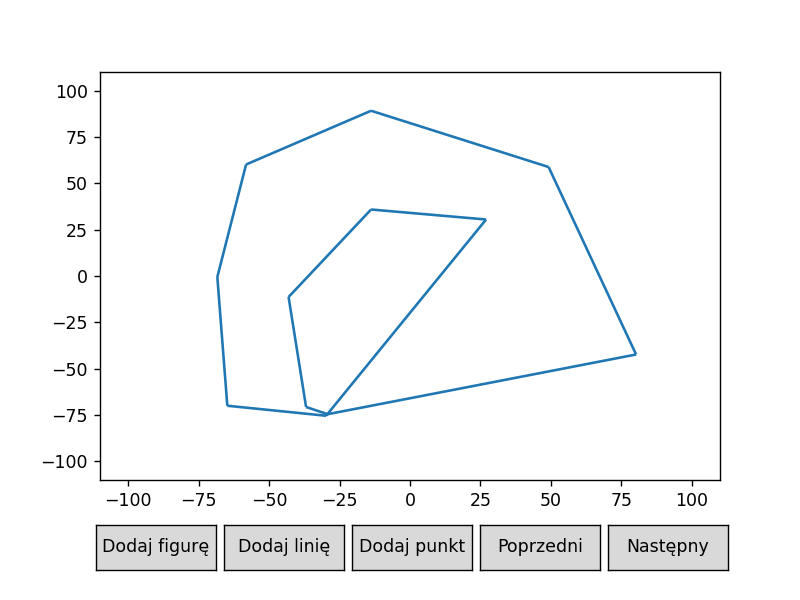

In [9]:
%matplotlib notebook
abc = Plot(scenes = [Scene(points = [PointsCollection([(-100,-100),(100,100)],color="white")])])
abc.draw()